<a href="https://colab.research.google.com/github/vishalrec1/Python/blob/master/LendingClub_DataSet_Analysis_and_ANN_model_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Overview

Below is the information on Lending Club data set:

**loan_amnt**         The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**term**             The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate**          Interest Rate on the loan

**installment**       The monthly payment owed by the borrower if the loan originates.

**grade**             LC assigned loan grade

**sub_grade**         LC assigned loan subgrade

**emp_title**         The job title supplied by the Borrower when applying for the loan.*

**emp_length**        Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

# Retrieve Feature Description

## `Option 1`

In [0]:
#READ csv FILE OF FEATURE INFO AND CREATE IT DATAFRAME
import pandas as pd

In [0]:
feature_info_df = pd.read_csv('/tensorflow-1.15.2/python3.6/lending_club_info.csv')

In [0]:
#Function to get the Feature Description - Option#1
def getFeatureDesc(Featr_Name):
  return feature_info_df[ feature_info_df['LoanStatNew'] == Featr_Name ].iloc[0][1]


In [6]:
print(getFeatureDesc('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [7]:
print(getFeatureDesc('grade'))

LC assigned loan grade


## Option 2


In [0]:
#READ csv FILE OF FEATURE INFO AND CREATE IT DATAFRAME WITH FIRST COLUMN AS INDEX

In [0]:
feature_info_df2 = pd.read_csv('/tensorflow-1.15.2/python3.6/lending_club_info.csv',index_col=['LoanStatNew'])

In [10]:
feature_info_df2.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [11]:
feature_info_df2.loc['term']

Description    The number of payments on the loan. Values are...
Name: term, dtype: object

In [12]:
feature_info_df2.loc['term']['Description']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [0]:
#Function to get the Feature Description - Option#1
def getFeatureDesc2(Featr_Name):
  return feature_info_df2.loc[Featr_Name]['Description']

In [14]:
getFeatureDesc2('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [15]:
getFeatureDesc2('dti')

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [16]:
getFeatureDesc2('grade')

'LC assigned loan grade'

# Get Data from Source File

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/tensorflow-1.15.2/python3.6/lending_club_loan_two.csv')

In [19]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [20]:
df.shape

(396030, 27)

In [21]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [23]:
# Identify which Features have the null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Exploratory Data Analysis (EDA)

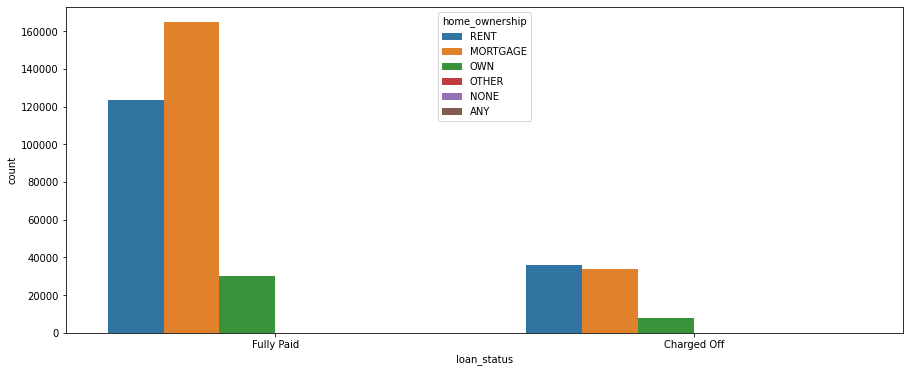

In [24]:
# Show the Countplot of records per Loan Status
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='loan_status',hue='home_ownership')

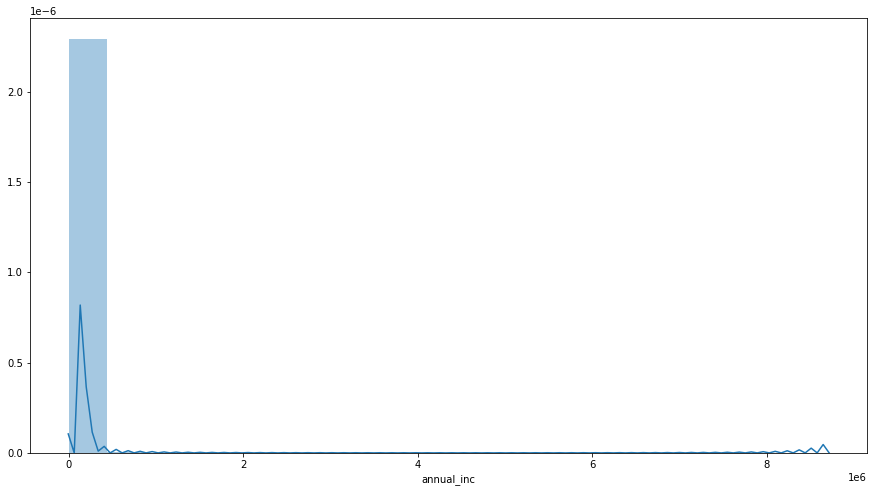

In [25]:
#Show the distribution of Annual Income of people along with Loan Status i.e. see the relationship of Annual Income and Loan Status --TBC
plt.figure(figsize=(15,8))
sns.distplot(df['annual_inc'],bins=20)

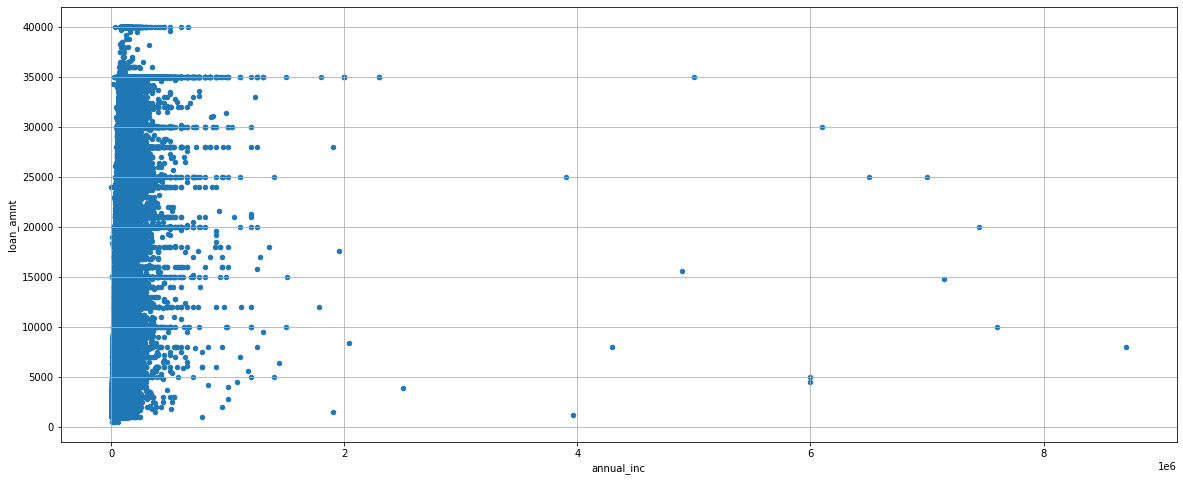

In [26]:
df.plot(kind='scatter',x='annual_inc',y='loan_amnt',grid=True,figsize=(20,8),)

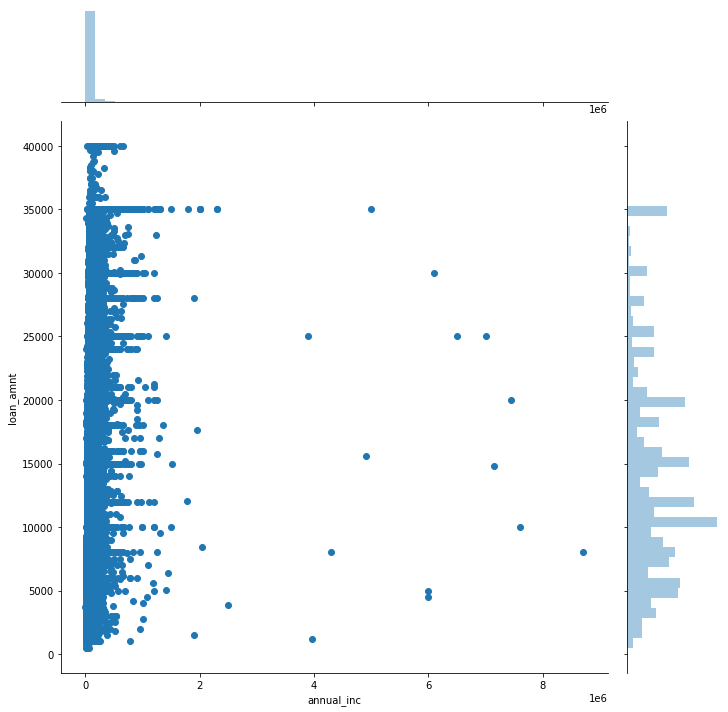

In [27]:
sns.jointplot(data=df,kind='scatter',x='annual_inc',y='loan_amnt',height=10,)

(array([2.7420e+03, 7.4500e+03, 1.0489e+04, 1.2791e+04, 2.0755e+04,
        2.2033e+04, 1.6495e+04, 2.1415e+04, 1.4714e+04, 3.7229e+04,
        1.2498e+04, 2.7261e+04, 9.8230e+03, 1.0588e+04, 2.6409e+04,
        1.4103e+04, 7.0870e+03, 1.3769e+04, 5.8370e+03, 2.2546e+04,
        8.0130e+03, 4.7010e+03, 3.7470e+03, 1.0780e+04, 1.1336e+04,
        2.2570e+03, 2.1860e+03, 6.9460e+03, 1.4940e+03, 8.0720e+03,
        8.9700e+02, 1.9290e+03, 1.2930e+03, 1.0300e+03, 1.5054e+04,
        5.0000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00, 1.8500e+02]),
 array([  500. ,  1487.5,  2475. ,  3462.5,  4450. ,  5437.5,  6425. ,
         7412.5,  8400. ,  9387.5, 10375. , 11362.5, 12350. , 13337.5,
        14325. , 15312.5, 16300. , 17287.5, 18275. , 19262.5, 20250. ,
        21237.5, 22225. , 23212.5, 24200. , 25187.5, 26175. , 27162.5,
        28150. , 29137.5, 30125. , 31112.5, 32100. , 33087.5, 34075. ,
        35062.5, 36050. , 37037.5, 38025. , 39012.5, 40000. ]),
 <a list of 40 Patch objects>)

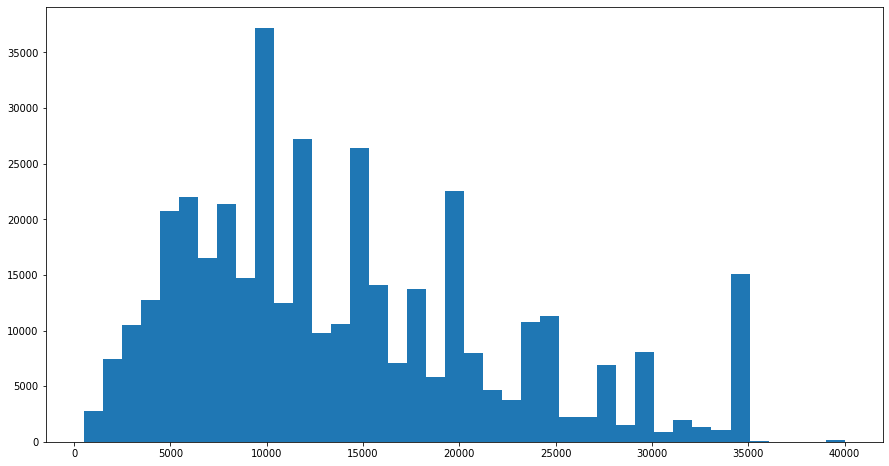

In [28]:
#Show Histogram of Loan Amount Feature
plt.figure(figsize=(15,8))
plt.hist(data=df,x='loan_amnt',bins=40,label='Loan Amount Distribution',)

In [29]:
df.groupby(by='loan_amnt').count()['term']

loan_amnt
500        4
700        1
725        1
750        1
800        1
        ... 
39475      1
39500      1
39600      1
39700      1
40000    180
Name: term, Length: 1397, dtype: int64

(array([3.83455e+05, 1.12250e+04, 9.63000e+02, 1.84000e+02, 9.00000e+01,
        4.90000e+01, 1.90000e+01, 1.30000e+01, 6.00000e+00, 0.00000e+00,
        4.00000e+00, 5.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.  ,  174131.64,  348263.28,  522394.92,  696526.56,
         870658.2 , 1044789.84, 1218921.48, 1393053.12, 1567184.76,
        1741316.4 , 1915448.04, 2089579.68, 2263711.32, 2437842.96,
        2611974.6 , 2786106.24, 2960237.88, 3134369.52, 3308501.

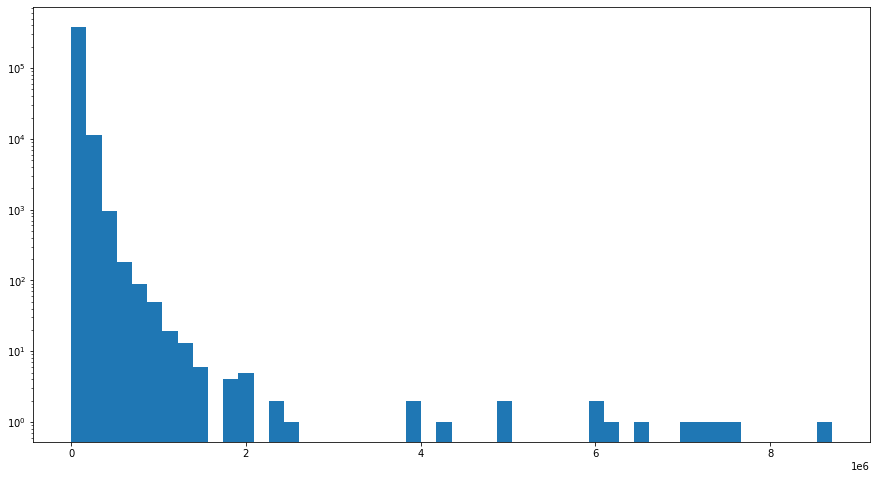

In [30]:
# Show Histogram of Annual Income
plt.figure(figsize=(15,8))
plt.hist(data=df, x='annual_inc',bins=50,log=True,)

In [31]:
df['annual_inc'].sort_values(ascending=False)

308700    8706582.0
318255    7600000.0
100370    7446395.0
376306    7141778.0
100946    7000000.0
            ...    
127390       4000.0
72405        4000.0
7011         2500.0
350865        600.0
285674          0.0
Name: annual_inc, Length: 396030, dtype: float64

In [32]:
df.groupby(by='annual_inc',).count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
annual_inc,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
600.0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2500.0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4000.0,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
4080.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7141778.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7446395.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
inc_bins = [n for n in range(0,9000000,100000)]

In [34]:
len(inc_bins)

90

(array([3.20168e+05, 6.75180e+04, 6.06300e+03, 1.36900e+03, 4.21000e+02,
        1.88000e+02, 1.01000e+02, 5.80000e+01, 3.40000e+01, 3.50000e+01,
        1.30000e+01, 7.00000e+00, 1.90000e+01, 4.00000e+00, 3.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00,
        4.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

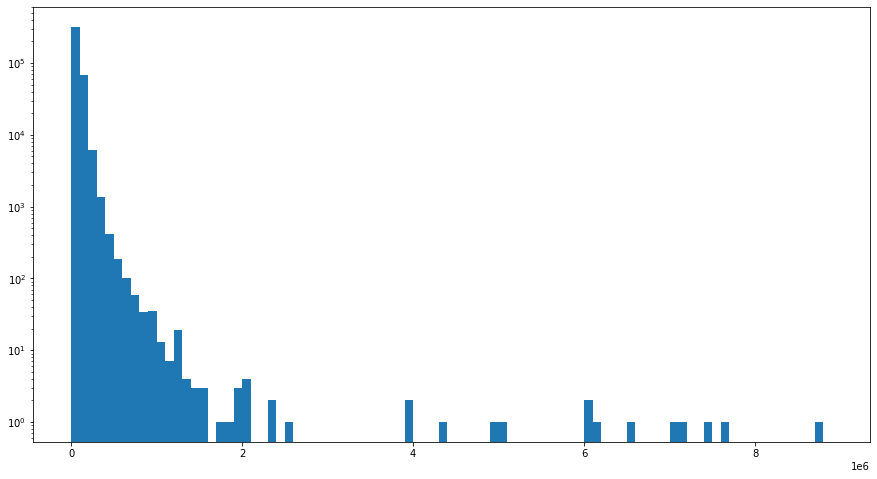

In [35]:
plt.figure(figsize=(15,8))
plt.hist(data=df,x='annual_inc',bins=inc_bins,range=[0,1000000],log=True)

In [36]:
#Correlation between various Features
df.corr()['loan_amnt'].sort_values()

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

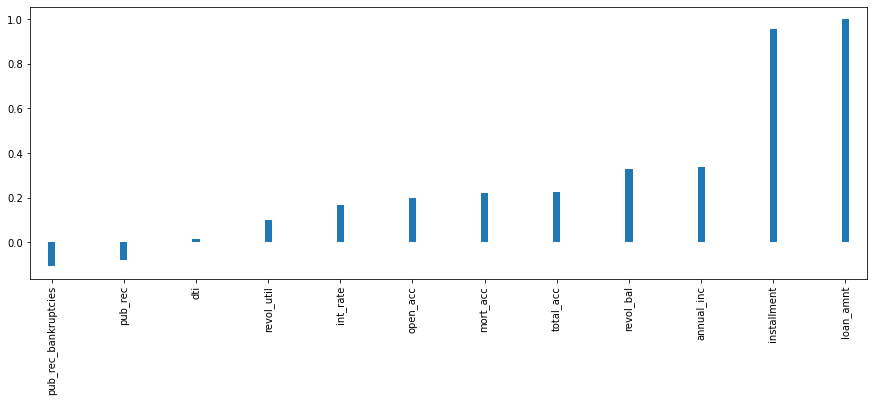

In [37]:
df.corr()['loan_amnt'].sort_values().plot(kind='bar',figsize = (15,5),width=0.1)

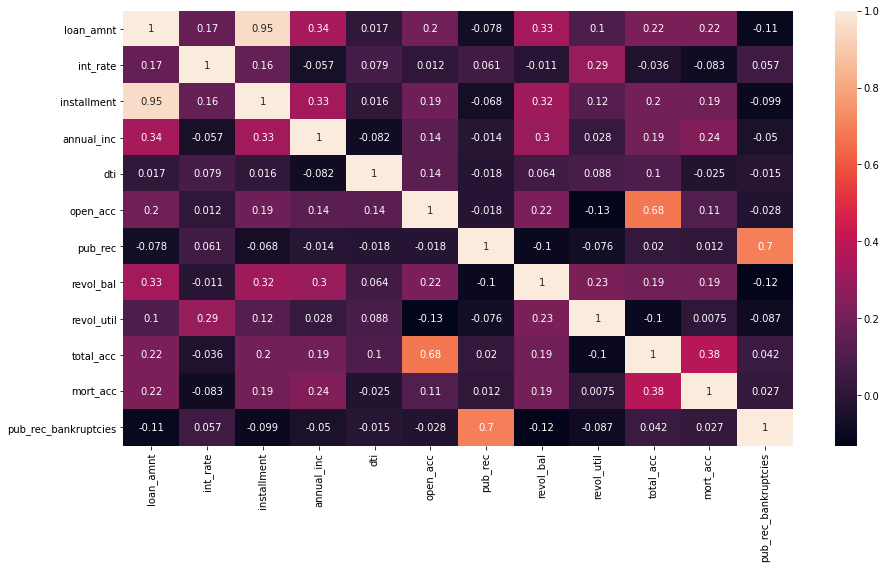

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,)

In [39]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-15,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-05,8,0,25757,100.6,23,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-15,Fully Paid,home_improvement,Home improvement,1.36,Aug-05,8,0,4178,4.9,25,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-12,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-94,11,0,13425,64.5,15,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-14,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-94,13,0,18637,32.9,40,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-12,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-97,13,0,22171,82.4,37,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [40]:
getFeatureDesc2('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [41]:
getFeatureDesc2('installment')

'The monthly payment owed by the borrower if the loan originates.'

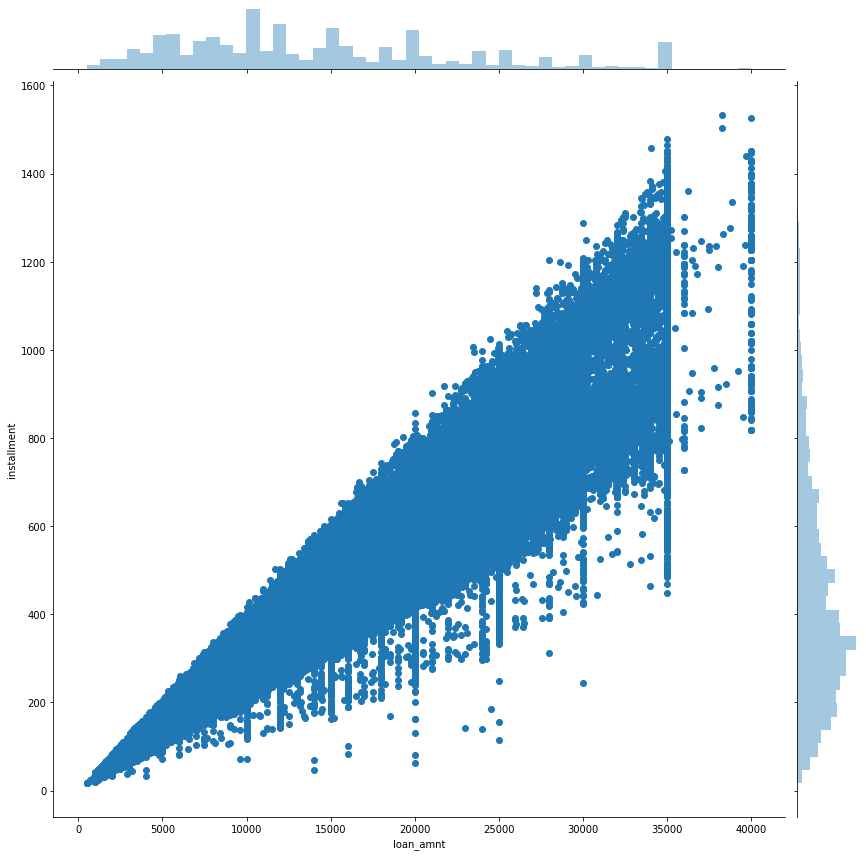

In [42]:
sns.jointplot(data=df,x='loan_amnt',y='installment',kind='scatter',height=12,ratio=10,)

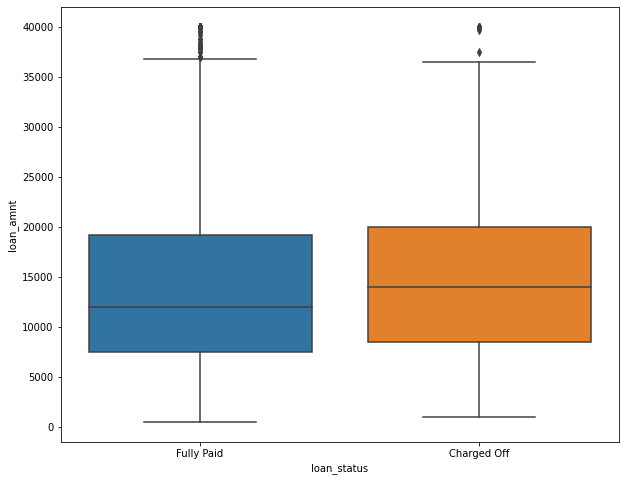

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='loan_status',y='loan_amnt',)

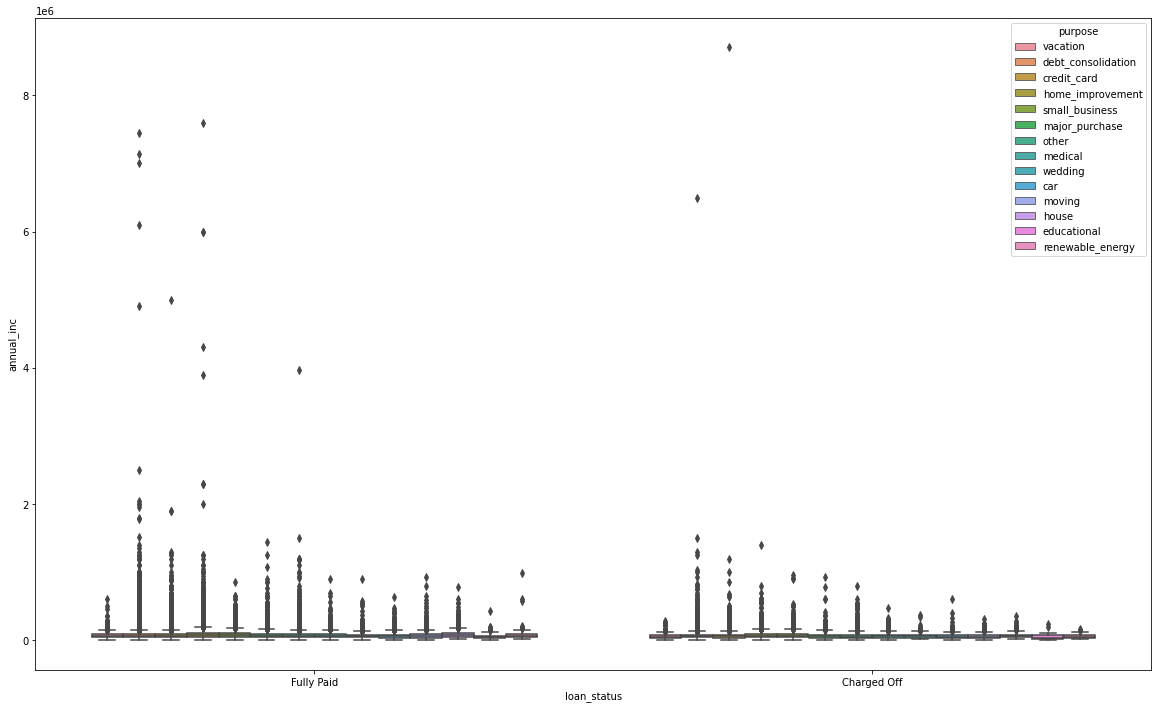

In [44]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df,x='loan_status',y='annual_inc',hue='purpose',)

In [45]:
df[['loan_amnt','loan_status']].groupby(by='loan_status').describe()

loan_amnt                             ...                           
                count          mean          std  ...      50%      75%      max
loan_status                                       ...                           
Charged Off   77673.0  15126.300967  8505.090557  ...  14000.0  20000.0  40000.0
Fully Paid   318357.0  13866.878771  8302.319699  ...  12000.0  19225.0  40000.0

[2 rows x 8 columns]

In [0]:
grade_lst = list(df['grade'].unique())

In [0]:
grade_lst.sort()

In [48]:
grade_lst

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [49]:
subgrade_lst = list(df['sub_grade'].unique())
subgrade_lst.sort()
subgrade_lst

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

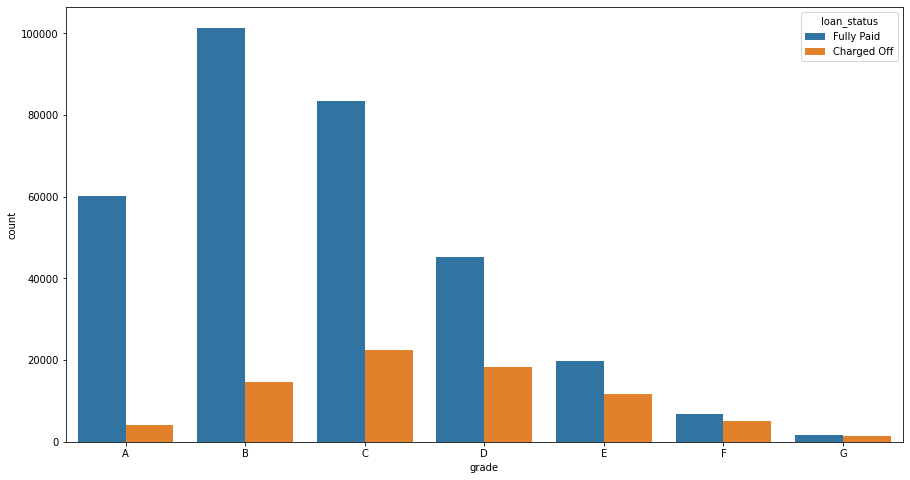

In [50]:
#Create a countplot per grade. Set the hue to the loan_status label.
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='grade',hue='loan_status',order = ['A','B','C','D','E','F','G'],)

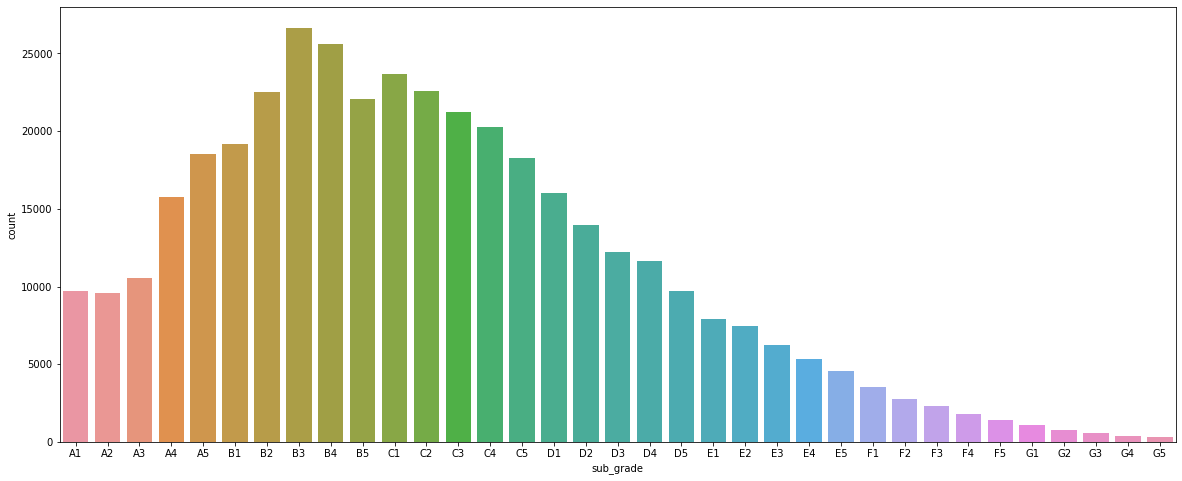

In [51]:
#Create a countplot per subgrade. Set the hue to the loan_status label.
plt.figure(figsize=(20,8))
sns.countplot(data=df.sort_values(by='sub_grade',),x='sub_grade',)

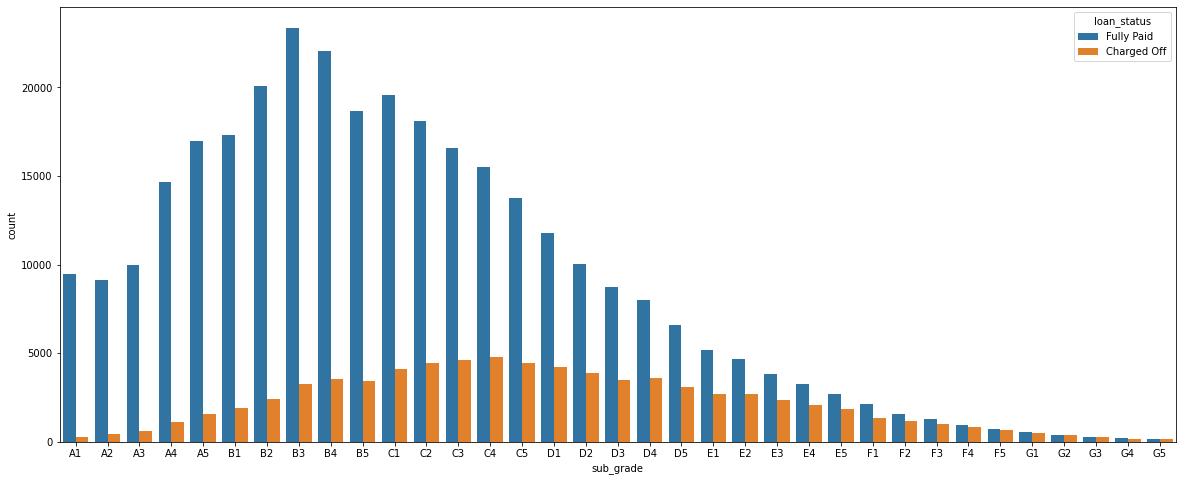

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(data=df.sort_values(by='sub_grade',),x='sub_grade',hue='loan_status')

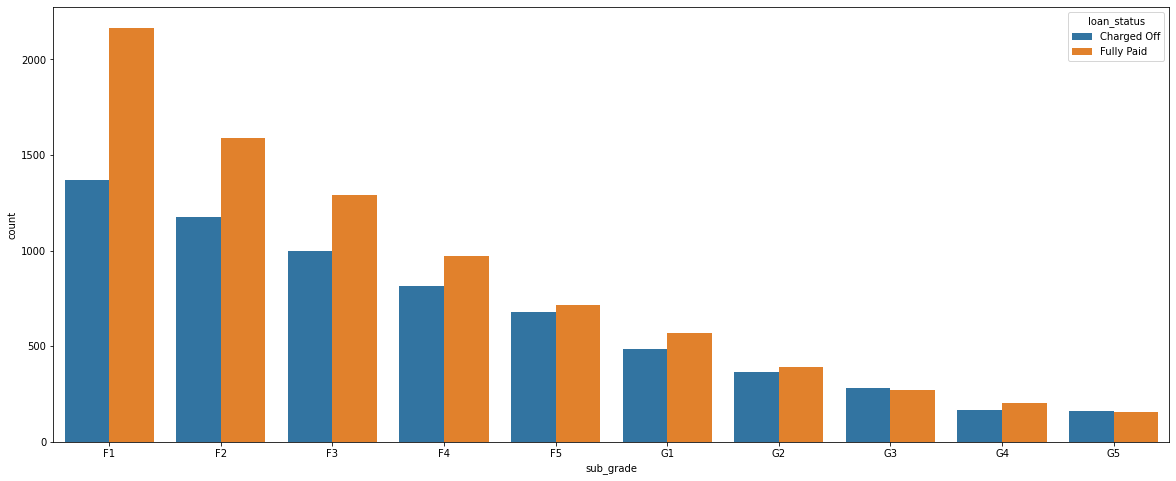

In [53]:
#It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

plt.figure(figsize=(20,8))
sns.countplot(data=df[df['grade'] >'E'].sort_values(by='sub_grade',),x='sub_grade',hue='loan_status')

In [0]:
#Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

#df['loan_repaid'] = df['loan_status'].apply(lambda x : 1 if(x=='Fully Paid') else 0)

# another way to do the above operation is

df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1,'Charged Off':0})

In [55]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


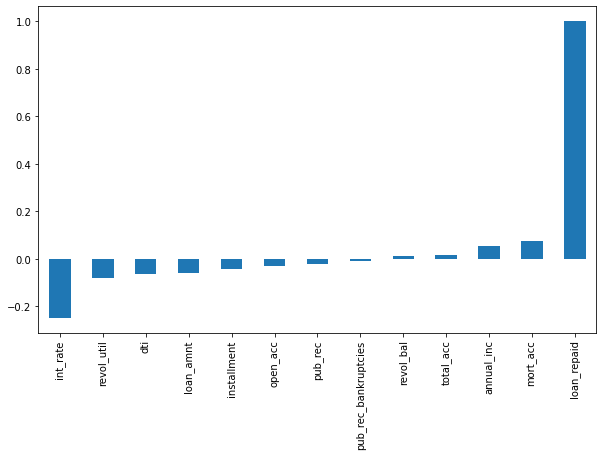

In [56]:
#Create a bar plot showing the correlation of the numeric features to the new loan_repaid column
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values().plot(kind='bar')

# Data Preprocessing

##### Missing Data Analysis

In [0]:
#Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [58]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [59]:
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [60]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [61]:
df.shape

(396030, 28)

In [62]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [63]:
df.count()

loan_amnt               396030
term                    396030
int_rate                396030
installment             396030
grade                   396030
sub_grade               396030
emp_title               373103
emp_length              377729
home_ownership          396030
annual_inc              396030
verification_status     396030
issue_d                 396030
loan_status             396030
purpose                 396030
title                   394275
dti                     396030
earliest_cr_line        396030
open_acc                396030
pub_rec                 396030
revol_bal               396030
revol_util              395754
total_acc               396030
initial_list_status     396030
application_type        396030
mort_acc                358235
pub_rec_bankruptcies    395495
address                 396030
loan_repaid             396030
dtype: int64

In [64]:
df.shape[0]

396030

In [65]:
len(df)

396030

In [66]:
getFeatureDesc2('emp_title')

'The job title supplied by the Borrower when applying for the loan.*'

In [67]:
getFeatureDesc2('emp_length')

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [68]:
len(list((df['emp_title'].unique())))

173104

In [0]:
# Since there are 173K Unique Titles, we cannot convert them to dummy variable Features. We can drop this Feature
df = df.drop(labels='emp_title',axis=1)

In [70]:
df.shape

(396030, 27)

In [71]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

In [72]:
df.groupby(by='emp_length').count()['loan_amnt']

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_amnt, dtype: int64

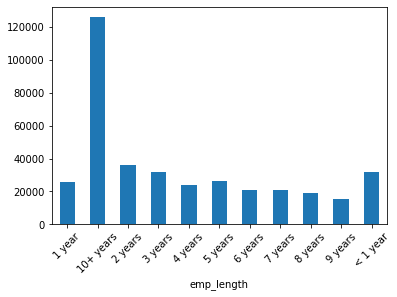

In [73]:
df.groupby(by='emp_length').count()['loan_amnt'].plot(kind='bar',rot=45)

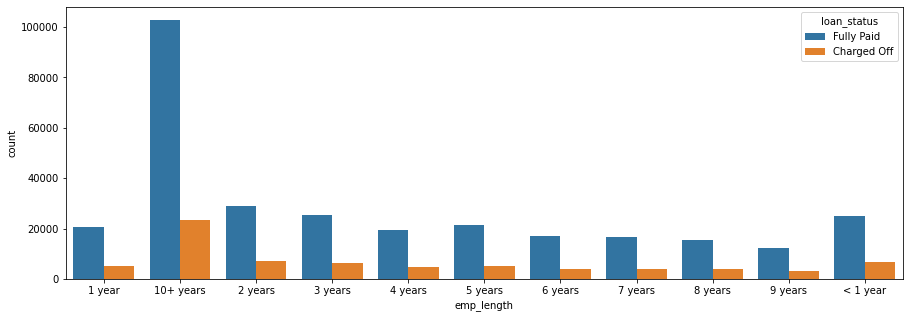

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(data=df.sort_values(by='emp_length',axis=0),x='emp_length',hue='loan_status',)

In [0]:
#Calculate : what is the percentage of charge offs per 'emp_length' category

In [0]:
df_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_amnt']

In [0]:
df_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_amnt']

In [0]:
emp_len=df_co/(df_co+df_fp)

In [79]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_amnt, dtype: float64

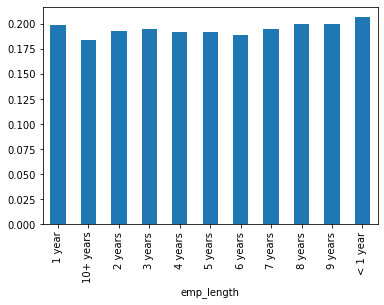

In [80]:
emp_len.plot(kind='bar')

In [0]:
#Since the %of people who are Charged Off are same across different Emp_length buckets, it is not providing significant information and hence dropping the Feature
df.drop(labels='emp_length',axis=1,inplace=True)

In [82]:
df.shape

(396030, 26)

In [83]:
sorted(df.columns)

['address',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_repaid',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status']

In [84]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
#Review the title column vs the purpose column. Is this repeated information?

In [86]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [87]:
len(list(df['title'].unique())) # There are 48791 unique titles

48791

In [88]:
len(list(df['purpose'].unique())) # There are 14 unique titles

14

In [89]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [90]:
df[['purpose','title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [0]:
#DROP 'title' Feature since there are huge # of title and 'purpose' Feature provides the related information
df.drop(labels=['title'],axis=1,inplace=True)

In [92]:
df.shape

(396030, 25)

In [93]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
#Analysis of mort_acc Feature

In [95]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [96]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [97]:
df.groupby(by='mort_acc').describe()['loan_amnt']['count']

mort_acc
0.0     139777.0
1.0      60416.0
2.0      49948.0
3.0      38049.0
4.0      27887.0
5.0      18194.0
6.0      11069.0
7.0       6052.0
8.0       3121.0
9.0       1656.0
10.0       865.0
11.0       479.0
12.0       264.0
13.0       146.0
14.0       107.0
15.0        61.0
16.0        37.0
17.0        22.0
18.0        18.0
19.0        15.0
20.0        13.0
21.0         4.0
22.0         7.0
23.0         2.0
24.0        10.0
25.0         4.0
26.0         2.0
27.0         3.0
28.0         1.0
30.0         1.0
31.0         2.0
32.0         2.0
34.0         1.0
Name: count, dtype: float64

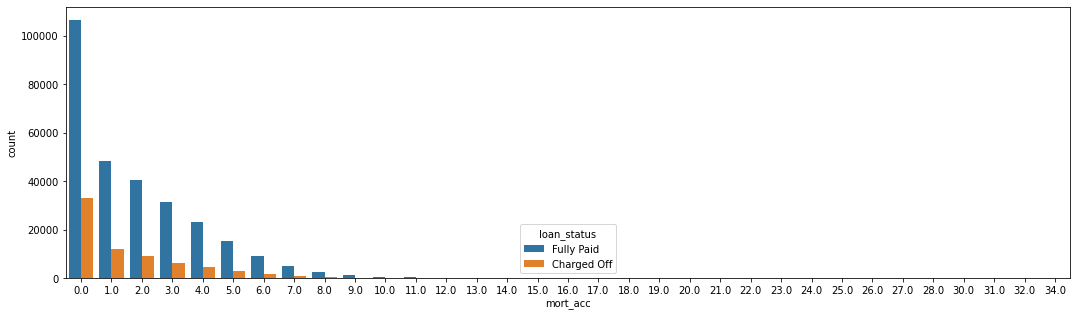

In [98]:
plt.figure(figsize=(18,5))
sns.countplot(data=df.sort_values(by='mort_acc'),x='mort_acc',hue='loan_status')

In [99]:
#review the other columsn to see which most highly correlates to mort_acc
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [100]:
#group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry
df['mort_acc'].groupby(by=df['total_acc']).mean()

total_acc
2      0.000000
3      0.052023
4      0.066743
5      0.103289
6      0.151293
         ...   
124    1.000000
129    1.000000
135    3.000000
150    2.000000
151    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [0]:
#fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value 
#corresponding to its total_acc value from the Series we created above.

In [0]:
#This is the first way we can fill in the missing values for mort_acc
mort_acc_mean = df['mort_acc'].groupby(by=df['total_acc']).mean()

In [103]:
mort_acc_mean

total_acc
2      0.000000
3      0.052023
4      0.066743
5      0.103289
6      0.151293
         ...   
124    1.000000
129    1.000000
135    3.000000
150    2.000000
151    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [0]:
def fill_mort_acc(total_acc,mort_acc):
  if(np.isnan(mort_acc)):
    return mort_acc_mean[int(total_acc)]
  else:
    return mort_acc

In [0]:
df['mort_acc2']=df.apply(lambda x :fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [106]:
df[df['mort_acc'].isnull()][['mort_acc','mort_acc2']]

,mort_acc,mort_acc2
22,NaN,0.221695
25,NaN,0.429158
32,NaN,1.235885
41,NaN,1.007405
62,NaN,1.151269
...,...,...
395991,NaN,1.519932
395995,NaN,1.409380
396016,NaN,1.721794
396021,NaN,3.220866


In [107]:
df[df['mort_acc'].notnull()][['mort_acc','mort_acc2']]

,mort_acc,mort_acc2
0,0.0,0.0
1,3.0,3.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
396024,0.0,0.0
396025,0.0,0.0
396026,1.0,1.0
396027,0.0,0.0


In [0]:
#This is another way we can use
df['mort_acc1']= df.apply(lambda x : mort_acc_mean[int(x['total_acc'])] if(np.isnan(x['mort_acc'])) else x['mort_acc'], axis =1)

In [109]:
df[df['mort_acc'].isnull()][['mort_acc','mort_acc1']]

,mort_acc,mort_acc1
22,NaN,0.221695
25,NaN,0.429158
32,NaN,1.235885
41,NaN,1.007405
62,NaN,1.151269
...,...,...
395991,NaN,1.519932
395995,NaN,1.409380
396016,NaN,1.721794
396021,NaN,3.220866


In [110]:
df[df['mort_acc'].notnull()][['mort_acc','mort_acc1']]

,mort_acc,mort_acc1
0,0.0,0.0
1,3.0,3.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
396024,0.0,0.0
396025,0.0,0.0
396026,1.0,1.0
396027,0.0,0.0


In [0]:
df.drop(labels=['mort_acc1','mort_acc2'],axis=1,inplace=True)

In [112]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
df['mort_acc']=df.apply(lambda x :fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [114]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [115]:
df.shape

(396030, 25)

In [0]:
#revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.
#Go ahead and remove the rows that are missing those values in those columns with dropna().

df.dropna(axis=0,inplace=True)


In [117]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [118]:
df.shape

(395219, 25)

# Categorical Variables and Dummy Variables

In [0]:
# In this section we need to deal with the Categorical Columns having the String values

In [124]:
#List all the columns that are currently non-numeric.
type(df.loc[1,'address'])

str

In [153]:
for c in df.columns:
  print('Column Name : ',c,' Type : ',type(df.loc[1,c]))

Column Name :  loan_amnt  Type :  <class 'numpy.int64'>
Column Name :  term  Type :  <class 'str'>
Column Name :  int_rate  Type :  <class 'numpy.float64'>
Column Name :  installment  Type :  <class 'numpy.float64'>
Column Name :  grade  Type :  <class 'str'>
Column Name :  sub_grade  Type :  <class 'str'>
Column Name :  home_ownership  Type :  <class 'str'>
Column Name :  annual_inc  Type :  <class 'numpy.float64'>
Column Name :  verification_status  Type :  <class 'str'>
Column Name :  issue_d  Type :  <class 'str'>
Column Name :  loan_status  Type :  <class 'str'>
Column Name :  purpose  Type :  <class 'str'>
Column Name :  dti  Type :  <class 'numpy.float64'>
Column Name :  earliest_cr_line  Type :  <class 'str'>
Column Name :  open_acc  Type :  <class 'numpy.int64'>
Column Name :  pub_rec  Type :  <class 'numpy.int64'>
Column Name :  revol_bal  Type :  <class 'numpy.int64'>
Column Name :  revol_util  Type :  <class 'numpy.float64'>
Column Name :  total_acc  Type :  <class 'numpy.i

In [250]:
df.select_dtypes(include=['object']).columns

Index(['verification_status', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [0]:
#Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [159]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [161]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [0]:
# First Method to extract 36 or 60 from the 'term' Feature
df['term1'] = df.apply(lambda x : int(x['term'].split()[0]),axis=1 )

In [169]:
df[['term','term1']]

,term,term1
0,36 months,36
1,36 months,36
2,36 months,36
3,36 months,36
4,60 months,60
...,...,...
396025,60 months,60
396026,36 months,36
396027,36 months,36
396028,60 months,60


In [0]:
#Second Method to extract 36 or 60 from the 'term' Feature

In [0]:
df['term2'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [175]:
df[['term','term2']]

,term,term2
0,36 months,36
1,36 months,36
2,36 months,36
3,36 months,36
4,60 months,60
...,...,...
396025,60 months,60
396026,36 months,36
396027,36 months,36
396028,60 months,60


In [263]:
s = ' 36 months'
int(s.lstrip()[:2])

36

In [0]:
#third Method

#test_df = pd.read_csv('/tensorflow-1.15.2/python3.6/lending_club_loan_two.csv')

test_df['term'] = test_df['term'].apply(lambda x : int(x.lstrip()[:2]))

In [0]:
#Converting 'term' to numeric datatype
df['term'] = df.apply(lambda x : int(x['term'].split()[0]),axis=1 )

In [180]:
df['term'].unique()

array([36, 60])

In [182]:
type(df.loc[1,'term'])

numpy.int64

In [0]:
# Drop column 'term1' and 'term2' for testing purpose
df.drop(labels=['term1','term2'],axis=1,inplace=True)

In [185]:
df.shape

(395219, 24)

In [0]:
#Drop 'grade' Feature since we already know sub_grades for grade, so just drop the grade feature.
df.drop(labels=['grade'],axis=1,inplace=True)

In [186]:
df.shape

(395219, 24)

In [0]:
#Convert the 'subgrade' Feature into dummy variables.

In [0]:
sub_grade_dummy_df = pd.get_dummies(data=df['sub_grade'],drop_first=False)

In [191]:
sub_grade_dummy_df['A1'].unique()

array([0, 1], dtype=uint8)

In [192]:
sub_grade_dummy_df.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df = df.join(sub_grade_dummy_df)

In [195]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A1', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [0]:
df.drop(labels=['sub_grade'],axis=1,inplace=True)

In [197]:
df.shape

(395219, 58)

In [198]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Convert the following Features into Dummy Variables:
  #verification_status
  #application_type
  #initial_list_status
  #purpose

  # There are 2 ways : work on individual Feature at a time or all Features at once

In [200]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [203]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [204]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [205]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [0]:
verification_dummy_df = pd.get_dummies(data=df['verification_status'])

In [207]:
verification_dummy_df

,Not Verified,Source Verified,Verified
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,0,1
396028,0,0,1


In [0]:
app_type_dummy_df = pd.get_dummies(data=df['application_type'])

In [209]:
app_type_dummy_df

,DIRECT_PAY,INDIVIDUAL,JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,1,0
396028,0,1,0


In [0]:
in_lst_status_dummy_df = pd.get_dummies(data=df['initial_list_status'])

In [211]:
in_lst_status_dummy_df

,f,w
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
396025,0,1
396026,1,0
396027,1,0
396028,1,0


In [0]:
purpose_dummy_df = pd.get_dummies(data=df['purpose'])

In [213]:
purpose_dummy_df

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df = df.join(other=[verification_dummy_df,app_type_dummy_df,in_lst_status_dummy_df,purpose_dummy_df])

In [215]:
df.shape

(395219, 80)

In [216]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Not Verified,Source Verified,Verified,DIRECT_PAY,INDIVIDUAL,JOINT,f,w,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [217]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'Not Verified', 'Source Verified', 'Verified', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'f', 'w', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [270]:
# Another method using which we will convert the Categorical Features in Dummy Variables at once

dummies = pd.get_dummies(data=test_df[['verification_status','application_type','purpose','initial_list_status']],drop_first=True)
pd.concat(objs=[  test_df.drop(labels=['verification_status','application_type','purpose','initial_list_status'],axis=1), dummies ],axis=1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,10000,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Jan-15,Fully Paid,Vacation,26.24,Jun-90,16,0,36369,41.8,25,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,8000,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Jan-15,Fully Paid,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Jan-15,Fully Paid,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Nov-14,Fully Paid,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Apr-13,Charged Off,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Oct-15,Fully Paid,Debt consolidation,15.63,Nov-04,6,0,1990,34.3,23,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
396026,21000,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Feb-15,Fully Paid,Debt consolidation,21.45,Feb-06,6,0,43263,95.7,8,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
396027,5000,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Oct-13,Fully Paid,pay off credit cards,17.56,Mar-97,15,0,32704,66.9,23,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
396028,21000,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Aug-12,Fully Paid,Loanforpayoff,15.88,Nov-90,9,0,15704,53.8,20,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
396026,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
#Get the value_counts for the home_ownership column
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [0]:
#Replace NONE and ANY with OTHER
df['home_ownership'].replace(to_replace=['NONE','ANY'],value='OTHER',inplace=True)

In [223]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [0]:
home_own_dummy_df = pd.get_dummies(data=df['home_ownership'])

In [225]:
home_own_dummy_df

,MORTGAGE,OTHER,OWN,RENT
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
396025,0,0,0,1
396026,1,0,0,0
396027,0,0,0,1
396028,1,0,0,0


In [0]:
df = df.join(home_own_dummy_df)

In [227]:
df.shape

(395219, 84)

In [0]:
df.drop(labels=['home_ownership'],axis=1,inplace=True)

In [229]:
df.shape

(395219, 83)

In [0]:
#Extract Zip Code from the address in the data set
df['zip_code'] = df['address'].apply(lambda x : x.split()[-1])

In [237]:
df[['address','zip_code']]

,address,zip_code
0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\nGreggshire, VA 11650",11650
...,...,...
396025,"12951 Williams Crossing\nJohnnyville, DC 30723",30723
396026,"0114 Fowler Field Suite 028\nRachelborough, LA...",05113
396027,"953 Matthew Points Suite 414\nReedfort, NY 70466",70466
396028,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",29597


In [238]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [0]:
zip_code_dummy_df = pd.get_dummies(data=df['zip_code'])

In [240]:
zip_code_dummy_df

,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,1,0,0,0,0
396026,0,1,0,0,0,0,0,0,0,0
396027,0,0,0,0,0,0,0,1,0,0
396028,0,0,0,0,1,0,0,0,0,0


In [0]:
df.drop(labels=['zip_code','address'],axis=1,inplace=True)

In [242]:
df.shape

(395219, 82)

In [243]:
df['issue_d']

0         Jan-15
1         Jan-15
2         Jan-15
3         Nov-14
4         Apr-13
           ...  
396025    Oct-15
396026    Feb-15
396027    Oct-13
396028    Aug-12
396029    Jun-10
Name: issue_d, Length: 395219, dtype: object

In [0]:
#Drop Column 'issue_d' because we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so drop this feature.
df.drop(labels=['issue_d'],axis=1,inplace=True)

In [245]:
df.shape

(395219, 81)

In [246]:
df['earliest_cr_line']

0         Jun-90
1         Jul-04
2         Aug-07
3         Sep-06
4         Mar-99
           ...  
396025    Nov-04
396026    Feb-06
396027    Mar-97
396028    Nov-90
396029    Sep-98
Name: earliest_cr_line, Length: 395219, dtype: object

In [247]:
getFeatureDesc2('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [0]:
#Extract the year from 'earliest_cr_line' feature using a .apply function, then convert it to a numeric feature.
#Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

df['earliest_cr_year'] =  df['earliest_cr_line'].apply(lambda x : 2000+int(x[-2:]) if(int(x[-2:])<20) else 1900+int(x[-2:]) )

In [274]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [0]:
df.drop(labels=['earliest_cr_line'],axis=1,inplace=True)

In [276]:
df.shape

(395219, 81)

# Train Test Split

In [0]:
#Split the Data into Train and Test Set

In [0]:
from sklearn.model_selection import train_test_split

In [280]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Not Verified', 'Source Verified',
       'Verified', 'DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'f', 'w', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'earliest_cr_year'],
      dtype='object')

In [281]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [0]:
df.drop(labels=['loan_status'],axis=1,inplace=True)

In [0]:
X=df.drop(labels='loan_repaid',axis=1)

In [0]:
y = df['loan_repaid']

In [0]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [339]:
X_train.shape

(316175, 75)

In [340]:
X_test.shape

(79044, 75)

# Normalizing the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
#help(MinMaxScaler)

In [295]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored

In [297]:
df

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Not Verified,Source Verified,Verified,DIRECT_PAY,INDIVIDUAL,JOINT,f,w,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,MORTGAGE,OTHER,OWN,RENT,earliest_cr_year
0,10000,36,11.44,329.48,117000.0,Not Verified,vacation,26.24,16,0,36369,41.8,25,w,INDIVIDUAL,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1990
1,8000,36,11.99,265.68,65000.0,Not Verified,debt_consolidation,22.05,17,0,20131,53.3,27,f,INDIVIDUAL,3.000000,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2004
2,15600,36,10.49,506.97,43057.0,Source Verified,credit_card,12.79,13,0,11987,92.2,26,f,INDIVIDUAL,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2007
3,7200,36,6.49,220.65,54000.0,Not Verified,credit_card,2.60,6,0,5472,21.5,13,f,INDIVIDUAL,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2006
4,24375,60,17.27,609.33,55000.0,Verified,credit_card,33.95,13,0,24584,69.8,43,f,INDIVIDUAL,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60,10.99,217.38,40000.0,Source Verified,debt_consolidation,15.63,6,0,1990,34.3,23,w,INDIVIDUAL,0.000000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2004
396026,21000,36,12.29,700.42,110000.0,Source Verified,debt_consolidation,21.45,6,0,43263,95.7,8,f,INDIVIDUAL,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2006
396027,5000,36,9.99,161.32,56500.0,Verified,debt_consolidation,17.56,15,0,32704,66.9,23,f,INDIVIDUAL,0.000000,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1997
396028,21000,60,15.31,503.02,64000.0,Verified,debt_consolidation,15.88,9,0,15704,53.8,20,f,INDIVIDUAL,5.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1990


In [0]:
df.drop(labels=['verification_status','purpose','application_type'],axis=1,inplace=True)

In [299]:
#Check the Categorical Columns
df.select_dtypes(include=['object']).columns

Index(['initial_list_status'], dtype='object')

In [300]:
df['initial_list_status']

0         w
1         f
2         f
3         f
4         f
         ..
396025    w
396026    f
396027    f
396028    f
396029    f
Name: initial_list_status, Length: 395219, dtype: object

In [0]:
df.drop(labels=['initial_list_status'],axis=1,inplace=True)

In [303]:
#Check the Categorical Columns
df.select_dtypes(include=['object']).columns  # There are no more Categorical Features

Index([], dtype='object')

In [0]:
#Now Run the cells from Train Test Split Section again to rebuild X, y and Training and Test Dataset

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Creating the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=78,activation='relu'))
model.add(Dense(units=78,activation='relu'))
model.add(Dense(units=78,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
#How to choose the number of hidden layers and nodes in a feedforward neural network?

#   https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


In [335]:
model.fit(x=X_train,y=y_train,epochs=250,validation_data=(X_test,y_test),batch_size=250)

Epoch 1/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4590 - val_loss: 2.1535
Epoch 2/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4542 - val_loss: 2.2373
Epoch 3/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4533 - val_loss: 1.7357
Epoch 4/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4524 - val_loss: 1.8588
Epoch 5/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4515 - val_loss: 1.7867
Epoch 6/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4508 - val_loss: 1.0925
Epoch 7/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4500 - val_loss: 1.3102
Epoch 8/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4495 - val_loss: 0.8514
Epoch 9/250
1107/1107 [==============================] - 4s 3ms/step - loss: 0.4487 - val_loss: 0.5513
Epoch 10/250
1107/1107 [==============================] - 4s 3ms/step - l

In [0]:
losses_df = pd.DataFrame(model.history.history)

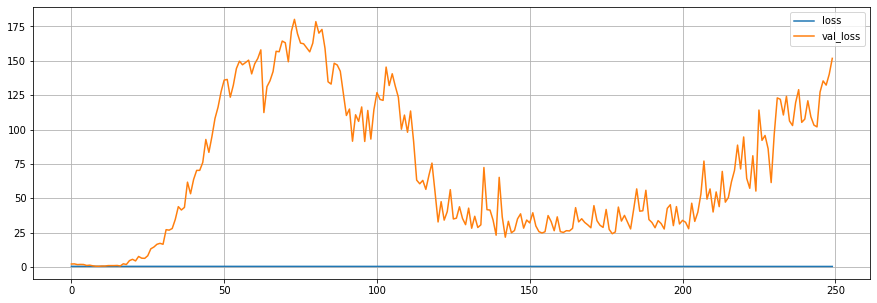

In [337]:
losses_df.plot(figsize = (15,5),grid=True)

In [0]:
#The above model has increasing validation loss and hence it is not a good model. Let's try building another model

model = Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [346]:
X_train.shape

(316175, 75)

In [347]:
model.fit(x=X_train,y=y_train,epochs=30,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4727 - val_loss: 0.4581
Epoch 2/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4611 - val_loss: 0.4580
Epoch 3/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4583 - val_loss: 0.4572
Epoch 4/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4567 - val_loss: 0.4564
Epoch 5/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4556 - val_loss: 0.4566
Epoch 6/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4548 - val_loss: 0.4558
Epoch 7/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4546 - val_loss: 0.4553
Epoch 8/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4541 - val_loss: 0.4557
Epoch 9/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4538 - val_loss: 0.4555
Epoch 10/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.453

In [0]:
  #Save the Model
  from tensorflow.keras.models  import load_model

In [0]:
model.save('LendingClub_NN_Model.h5')

# Evaluating Model Performance

In [0]:
losses_df = pd.DataFrame(model.history.history)

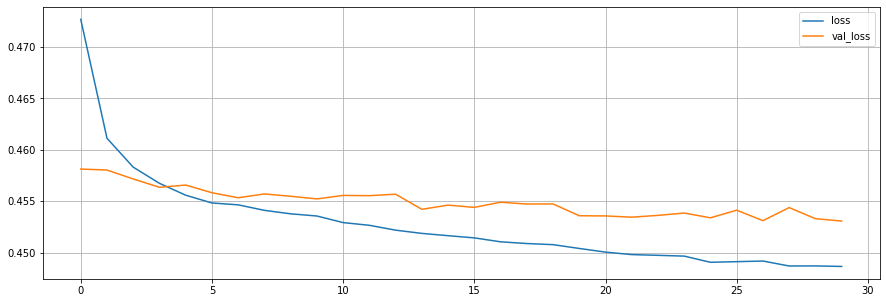

In [349]:
losses_df.plot(figsize = (15,5),grid=True)

In [0]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.
from sklearn.metrics import classification_report,confusion_matrix

In [353]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [355]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.04      0.07     15658
           1       0.81      0.99      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.68      0.51      0.48     79044
weighted avg       0.76      0.80      0.73     79044



In [356]:
print(confusion_matrix(y_test,pred))

[[  562 15096]
 [  464 62922]]


In [357]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
MORTGAGE                0.00
OTHER                   0.00
OWN                     0.00
RENT                    1.00
earliest_cr_year     1996.00
Name: 305323, Length: 75, dtype: float64

In [358]:
X_test.shape

(79044, 75)

In [0]:
new_customer = scaler.transform(new_customer.values.reshape(1,75))

In [363]:
model.predict_classes(x=new_customer)

array([[1]], dtype=int32)

In [365]:
df.iloc[random_ind]['loan_repaid']

1.0